In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('Mall_Customers.csv')

In [4]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,22,76,47
1,2,Male,36,91,46
2,3,Female,32,35,4
3,4,Female,58,56,76
4,5,Male,55,124,25


In [6]:
customer_data.shape

(5000, 5)

In [7]:
#getting some information
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              5000 non-null   int64 
 1   Gender                  5000 non-null   object
 2   Age                     5000 non-null   int64 
 3   Annual Income (k$)      5000 non-null   int64 
 4   Spending Score (1-100)  5000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 195.4+ KB


In [58]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,39.029000,60.830400,49.593600
std,1443.520003,13.019127,25.283969,24.115786
min,1.000000,18.000000,15.000000,1.000000
25%,1250.750000,29.000000,43.000000,32.000000
50%,2500.500000,39.000000,60.000000,50.000000
75%,3750.250000,48.000000,78.000000,67.000000
max,5000.000000,70.000000,137.000000,99.000000


In [61]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

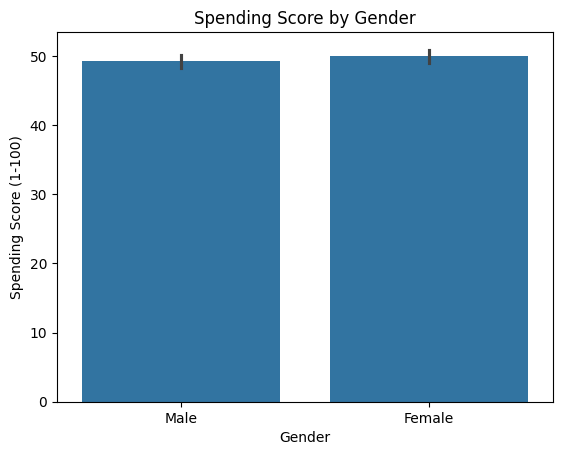

In [13]:
sns.barplot(y='Spending Score (1-100)', x='Gender', data=customer_data)
plt.title("Spending Score by Gender")
plt.show()

### The spending scores of males and females are nearly identical, as both bars are of the same height. This suggests that gender does not play a significant role in determining spending scores in this dataset.

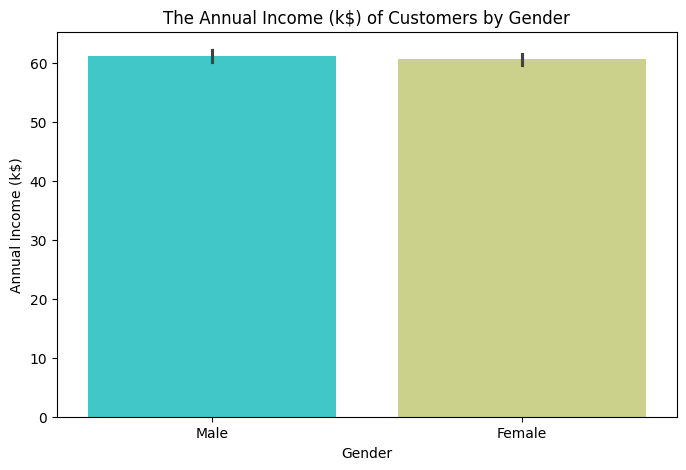

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(y='Annual Income (k$)', x='Gender', data=customer_data, hue='Gender', palette='rainbow', dodge=False)
plt.title("The Annual Income (k$) of Customers by Gender")
plt.show()

### the male group's income (represented by the cyan-colored bar) appears slightly higher than that of females (light olive-colored bar), but the difference is minimal.

In [34]:
X = customer_data.iloc[:,[3,4]].values

In [16]:
print(X)

[[76 47]
 [91 46]
 [35  4]
 ...
 [34 69]
 [97 58]
 [50 44]]


In [17]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

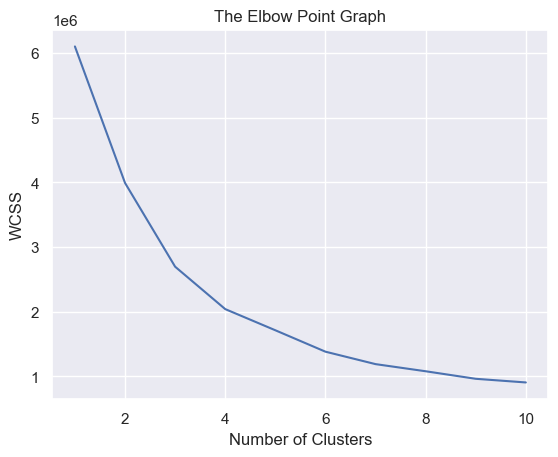

In [18]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## The Elbow Method suggests using K = 4 for optimal clustering in this dataset.

In [19]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 3 1 ... 0 2 1]


In [20]:
print(Y.tolist())

[3, 3, 1, 2, 3, 1, 2, 2, 1, 3, 2, 2, 0, 1, 1, 1, 3, 3, 3, 2, 0, 0, 2, 1, 2, 2, 2, 3, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 0, 2, 1, 3, 1, 3, 2, 1, 1, 0, 0, 0, 2, 0, 1, 3, 2, 3, 0, 1, 0, 2, 0, 1, 2, 3, 1, 1, 0, 3, 0, 0, 2, 3, 3, 1, 0, 1, 3, 2, 2, 0, 3, 0, 2, 0, 1, 1, 0, 1, 1, 3, 3, 3, 2, 2, 3, 0, 0, 2, 1, 3, 3, 3, 1, 2, 0, 2, 0, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 2, 1, 2, 1, 1, 1, 3, 0, 0, 2, 0, 0, 3, 0, 1, 2, 3, 1, 2, 2, 2, 1, 0, 2, 2, 1, 3, 1, 0, 1, 3, 2, 2, 1, 3, 0, 2, 1, 3, 1, 0, 2, 2, 3, 2, 0, 2, 2, 2, 0, 2, 2, 3, 3, 2, 0, 3, 3, 1, 2, 0, 3, 1, 1, 2, 2, 1, 3, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 0, 2, 3, 1, 0, 1, 3, 0, 1, 2, 3, 3, 0, 2, 2, 1, 2, 3, 2, 2, 3, 2, 3, 0, 2, 2, 0, 1, 2, 0, 3, 3, 0, 0, 2, 1, 1, 1, 3, 3, 1, 2, 1, 0, 0, 2, 2, 1, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 2, 3, 1, 1, 3, 3, 2, 2, 3, 3, 1, 0, 2, 1, 3, 2, 2, 0, 0, 3, 1, 1, 1, 2, 1, 1, 1, 3, 0, 0, 1, 0, 2, 1, 3, 3, 2, 2, 2, 1, 3, 3, 0, 1, 1, 3, 0, 0, 2, 2, 3, 3, 3, 1, 1, 1, 2, 0, 3, 1, 1, 0, 3, 

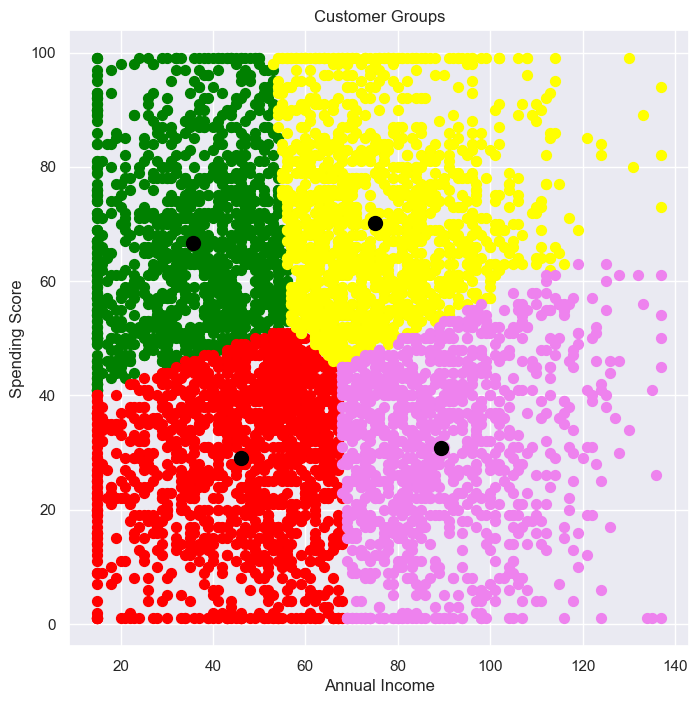

In [42]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


# Graphs Interpretation
## Cluster 1 (Green) shows the customers that has low income and high spending score
## Cluster 2 (Red) shows the customers that has low income and low spending score
## Cluster 3 (Yellow) shows the customers that has high income and high spending score
## Cluster 4 (violet) shows the customers that has high income and low spending score

In [87]:
# Display the first few rows
print(final_table)

      Annual Income  Spending Score  Cluster
0                76              47        4
1                91              46        4
2                35               4        2
3                56              76        3
4               124              25        4
...             ...             ...      ...
4996             67              42        2
4997             34              69        1
4998             97              58        3
4999             50              44        2
5000             49              45        2

[5001 rows x 3 columns]


In [89]:
# Display as a formatted table if using Jupyter Notebook
import IPython.display as ipd
ipd.display(final_table)

,Annual Income,Spending Score,Cluster
0,76,47,4
1,91,46,4
2,35,4,2
3,56,76,3
4,124,25,4
...,...,...,...
4996,67,42,2
4997,34,69,1
4998,97,58,3
4999,50,44,2


In [40]:
# Add functionality to add a new customer
new_customer = np.array([[100, 30]])  # Example: [Annual Income, Spending Score]
new_customer_cluster = kmeans.predict(new_customer)[0]

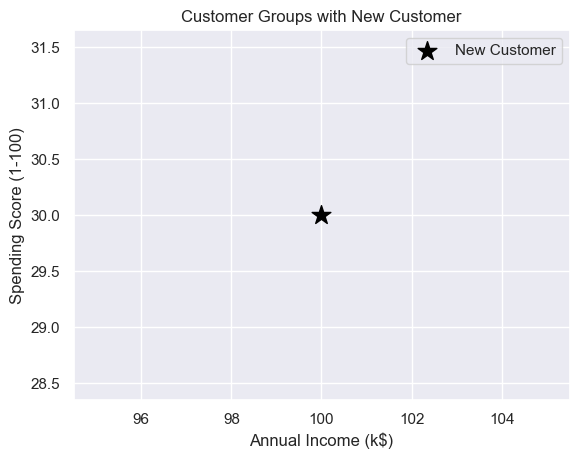

New customer belongs to Cluster 4


In [41]:
# Plot the new customer with a distinct color and marker
plt.scatter(new_customer[0, 0], new_customer[0, 1], 
            s=200, c='black', marker='*', label='New Customer')

# Finalizing the plot
plt.title('Customer Groups with New Customer')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()  # Ensure legend is added after all labeled plots
plt.show()

print(f"New customer belongs to Cluster {new_customer_cluster + 1}")